In [51]:
import importlib
from nnls_l1 import nnls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from helpers.generators import *
from helpers.data import X_WINE, PPM_WINE
import Hardmodel_single_peaks
importlib.reload(Hardmodel_single_peaks)
from Hardmodel_single_peaks import Single_Model
import Hardmodel
importlib.reload(Hardmodel)
from Hardmodel import Hard_Model


import helpers.fit_functions 
importlib.reload(helpers.fit_functions)
from helpers.fit_functions import *

In [52]:
data = np.loadtxt("lactid_acid.txt")[30000:55000]
ppm = data[:,0]
X = data[:,1]
means, sigmas, n = single_fit(X, min_height=0.05, min_sigma=1, lr=10 , plot=True)
#diff_matrix = calc_difference_matrix(sigmas)
diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
hypothesis = peak_hypothesis(diff_matrix, cutoff=10/100)
hardmodel = Hard_Model(X, hypothesis, means, sigmas, n, lr=10, alpha = 1e-3, factor=1, patience=1, min_imp=0.01)

W, C, running_loss, path, lambdas, loss = hardmodel.fit(verbose=True, return_loss=True)
means, sigma, j_coup, mult, n, w = hardmodel.return_values()

print("FINAL FOUND VALUES")
print("means:")
print(means)
print("means in ppm")
print([ppm[int(m)] for m in means])
print("sigmas:")
print(sigma)
print("J coupling:")
print(j_coup)
print("coupling in ppm")
print([ppm[0]-ppm[int(m)] for m in j_coup])
print("multiplicity")
print(mult)
print("N")
print(n)
print("W")
print(w)

path = path[0]
lambdas = lambdas[0]

Found peaks:[ 6870  6944  7017  7091 19957 20031]


KeyboardInterrupt: 

[ 0  1  2  3  4  5  6  7  8  9 32 33 34 35 36 37 38 39 44 41 42 43 31 45
 46 47 48 40 30 25 28 10 11 12 13 14 15 16 17 29 18 20 21 22 23 24 49 26
 27 19 50]
0.015125805509405435
0.00504810321446035


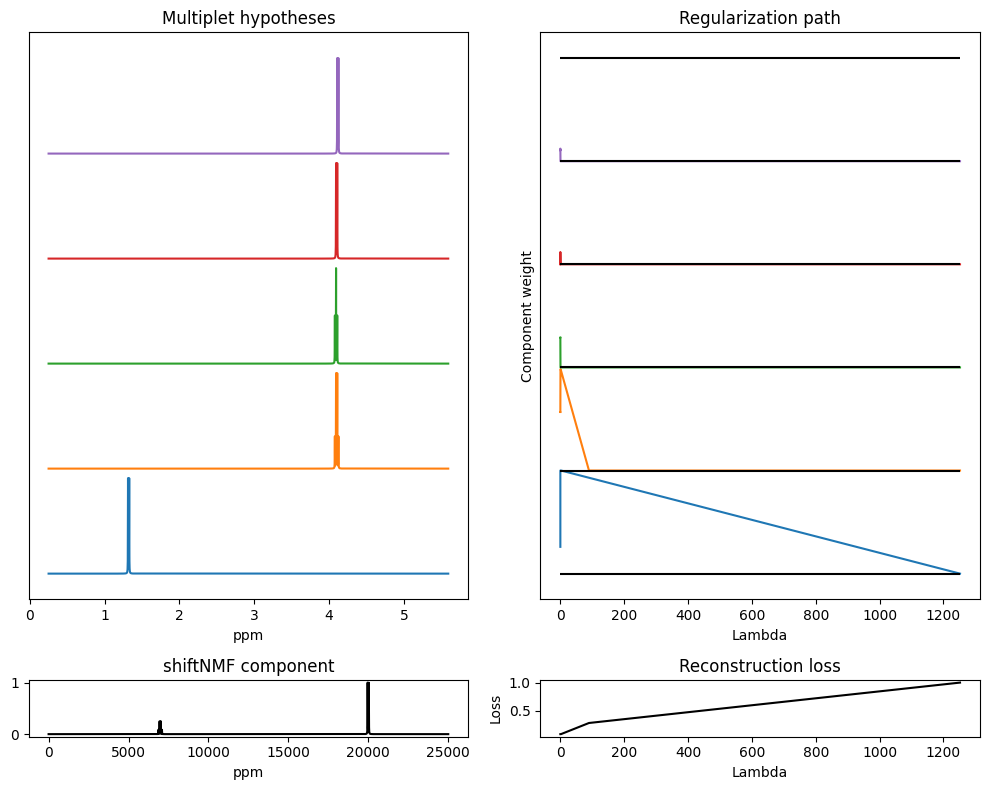

In [50]:


fig = plt.figure(figsize=(10, 8))
# Create a gridspec object with 2 rows and 3 columns
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[10,1])

# Plot H and H_est
ax1 = plt.subplot(gs[0])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1.set_title('Multiplet hypotheses')

ax1.set_xlabel("ppm")


ax2 = plt.subplot(gs[1])
ax2.set_title('Regularization path')
ax2.set_xlabel("Lambda")
ax2.set_ylabel("Component weight")

ax1.tick_params(left = False, labelleft = False)
ax2.tick_params(left = False, labelleft = False)

ax3 = plt.subplot(gs[2])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax3.set_title('shiftNMF component')
ax3.plot(X/max(X), color="k")
ax3.set_xlabel("ppm")

ax4 = plt.subplot(gs[3])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax4.set_title('Reconstruction loss')
ax4.plot(lambdas, loss, color="k")
ax4.set_xlabel("Lambda")
ax4.set_ylabel("Loss")


sort_indices = np.argsort([np.trapz(p,lambdas) for p in path])
print(sort_indices)
path = path[sort_indices]
C = C[sort_indices]

ymax = 1.1
yoffset = ymax
t = 0

nr_of_components = 5

for j in range(nr_of_components):
        ax1.plot(ppm,C[j]/max(C[j])+yoffset*t)
        t += 1


ymax = path.max()
yoffset = ymax
t = 0
for j in range(nr_of_components):
        ax2.plot(lambdas,path[j]+yoffset*t)
        ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
        t +=1
ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
print(np.trapz(ppm, C[0]))
print(np.trapz(ppm, C[1]))
      

plt.tight_layout()
plt.show()